在介绍深度神经网络之前，我们需要了解神经网络训练的基础知识。 本章我们将介绍神经网络的整个训练过程， 包括：定义简单的神经网络架构、数据处理、指定损失函数和如何训练模型。 为了更容易学习，我们将从经典算法————线性神经网络开始，介绍神经网络的基础知识。 经典统计学习技术中的线性回归和softmax回归可以视为线性神经网络， 这些知识将为本书其他部分中更复杂的技术奠定基础。

什么是线性回归呢？  
我们以线性回归的应用来说明什么是线性回归，(我当时学的时候，直接告诉我数学定义，我搞不清学着玩意儿有啥用) ，通过例子，我可以知道能用来干什么   
我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。为了开发一个模型以预测房价，我们需要收集一个真实的数据集。 这个数据集包括了房屋的销售价格、面积和房龄。   
在机器学习的术语中，该数据集称为训练数据集（training data set） 或训练集（training set）。 每行数据（比如一次房屋交易相对应的数据）称为样本（sample）， 也可以称为数据点（data point）或数据样本（data instance）。 我们把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）。 预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）。


通常，我们使用$n$来表示数据集中的样本数。
对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$，
其对应的标签是$y^{(i)}$。

线性回归模型是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

$w_{\mathrm{area}}$和$w_{\mathrm{age}}$
称为*权重*（weight），权重决定了每个特征对我们预测值的影响。
$b$称为*偏置*（bias）、*偏移量*（offset）或*截距*（intercept）。
偏置是指当所有特征都取值为0时，预测值应该为多少。
即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。
如果没有偏置项，我们模型的表达能力将受到限制。
严格来说， 该模型是输入特征的一个
*仿射变换*（affine transformation）。
仿射变换的特点是通过加权和对特征进行*线性变换*（linear transformation），
并通过偏置项来进行*平移*（translation）。

**综上所述，我们在面对预测问题的时候，先找出影响y的因素x，采用线性回归模型，即预测y = 影响因素x的加权和+偏置b** ；模型中的权值和偏置是未知数，我们可以先初始化权值和偏置，然后使用大量数据训练模型，即更新权值和偏置，使权值和偏置逐渐稳定。(这都是后话了，慢慢来) 

接下来看看线性回归的定义  
线性回归基于几个简单的假设：
1. 首先，假设自变量$\mathbf{x}$和因变量$y$之间的关系是线性的，
即$y$可以表示为$\mathbf{x}$中元素的加权和，这里通常允许包含观测值的一些噪声；
2. 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。  
真实值表示真实世界中的数据（总体）  
观测值表示机器学习模型的样本数据（样本），但不一定是真实世界中的数据（可以来自真实世界）  
预测值表示学习模型预测出的数据


在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。
当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$
（通常使用“尖角”符号表示$y$的估计值）表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，
并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，
我们可以用点积形式来简洁地表达模型：

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

**向量$\mathbf{x}$对应于单个数据样本的特征。
用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$
可以很方便地引用我们整个数据集的$n$个样本。
其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。**

对于特征集合$\mathbf{X}$，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$
可以通过矩阵-向量乘法表示为：

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

$\mathbf{X} \in \mathbb{R}^{n \times d}$，$\mathbf{w} \in \mathbb{R}^d$，$\hat{\mathbf{y}} \in \mathbb{R}^n$，b是标量

有了线性回归模型之后，如何训练模型呢？  
给定训练数据特征 𝐗 和对应的已知标签 𝐲 ， 线性回归的目标是找到一组权重向量 𝐰 和偏置 𝑏 ： 当给定从𝐗的同分布中取样的新样本特征时， 这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。

虽然我们相信给定$\mathbf{x}$预测$y$的最佳模型会是线性的，
但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1 \leq i \leq n$，$y^{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)}+b$。
无论我们使用什么手段来观察特征$\mathbf{X}$和标签$\mathbf{y}$，
都可能会出现少量的观测误差。
因此，即使确信特征与标签的潜在关系是线性的，
我们也会加入一个噪声项来考虑观测误差带来的影响。（噪声:对模型有误导作用的数据）

在开始寻找最好的*模型参数*（model parameters）$\mathbf{w}$和$b$之前，
我们还需要两个东西：  
（1）一种模型质量的度量方式；  
（2）一种能够更新模型以提高模型预测质量的方法。

## 损失函数
在我们开始考虑如何用模型拟合（fit）数据之前，我们需要确定一个拟合程度的度量。(模型拟合数据是让模型判断数据的标签时尽可能都判断正确)。    
损失函数（loss function）能够量化目标的实际值与预测值之间的差距。 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。  
回归问题中最常用的损失函数是平方误差函数。
当样本$i$的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时，
平方误差可以定义为以下公式：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$
常数$\frac{1}{2}$不会带来本质的差别，但这样在形式上稍微简单一些
（因为当我们对损失函数求导后常数系数为1）。  
由于平方误差函数中的二次方项，
估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。
**为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。**

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），
这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$
把所有的数据带入函数式，得到关于$\mathbf{w},b$的函数式，找到函数值(总损失)最小时的$\mathbf{w},b$

### 解析解

线性回归刚好是一个很简单的优化问题。
与我们将在本书中所讲到的其他大部分模型不同，线性回归的解可以用一个公式简单地表达出来，
这类解叫作解析解（analytical solution）。
首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。
我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。
这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。
将损失关于$\mathbf{w}$的导数设为0，得到解析解：

$$\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$$

像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。
解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

### 随机梯度下降

即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。
在许多任务上，那些难以优化的模型效果要更好。
因此，弄清楚如何训练这些难以优化的模型是非常重要的。

本书中我们用到一种名为*梯度下降*（gradient descent）的方法，
这种方法几乎可以优化所有深度学习模型。
它通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）
关于模型参数的导数（在这里也可以称为梯度）。
但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。
因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，
这种变体叫做*小批量随机梯度下降*（minibatch stochastic gradient descent）。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，
它是由固定数量的训练样本组成的。
然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。
最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数的值中减掉。

我们用下面的数学公式来表示这一更新过程（$\partial$表示偏导数）：

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下：
（1）初始化模型参数的值，如随机初始化；
（2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。
对于平方损失和仿射变换，我们可以明确地写成如下形式:

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$

公式 中的$\mathbf{w}$和$\mathbf{x}$都是向量。
在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。
$|\mathcal{B}|$表示每个小批量中的样本数，这也称为*批量大小*（batch size）。
$\eta$表示*学习率*（learning rate）。
批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。
这些可以调整但不在训练过程中更新的参数称为*超参数*（hyperparameter）。
*调参*（hyperparameter tuning）是选择超参数的过程。
超参数通常是我们根据训练迭代结果来调整的，
而训练迭代结果是在独立的*验证数据集*（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后），
我们记录下模型参数的估计值，表示为$\hat{\mathbf{w}}, \hat{b}$。
但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。
因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。
但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。
深度学习实践者很少会去花费大力气寻找这样一组参数，使得在*训练集*上的损失达到最小。
事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失，
这一挑战被称为*泛化*（generalization）。

## 矢量化加速
即应用线性代数里的向量运算  
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。
为了实现这一点，需要(**我们对计算进行矢量化，
从而利用线性代数库，而不是在Python中编写开销高昂的for循环**)。

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

为了说明矢量化为什么如此重要，我们考虑(**对向量相加的两种方法**)。
我们实例化两个全为1的10000维向量。
在一种方法中，我们将使用Python的for循环遍历向量；
在另一种方法中，我们将依赖对`+`的调用。


In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [3]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

首先，[**我们使用for循环，每次执行一位的加法**]。

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.10300 sec'

(**或者，我们使用重载的`+`运算符来计算按元素的和**)。

In [5]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

## 正态分布与平方损失
（视频中好像没有提到这部分内容，我们来了解一下这部分内容吧）  

接下来，我们通过对噪声分布的假设来解读平方损失目标函数。

正态分布和线性回归之间的关系很密切。(为什么这样说呢？)
正态分布（normal distribution），也称为*高斯分布*（Gaussian distribution），
最早由德国数学家高斯（Gauss）应用于天文学研究。
简单的说，**若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：**

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$  
下面[**我们定义一个Python函数来计算正态分布**]。  

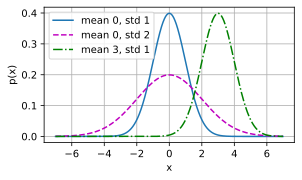

In [6]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。(没什么可说的，高中就学过的)

$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$  其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。  
y是真实值,$\mathbf{w}^\top \mathbf{x} + b$是预测值,$\epsilon$是误差,$\epsilon$服从正态分布  
$\epsilon=y-\mathbf{w}^\top \mathbf{x} - b$  
$y-\mathbf{w}^\top \mathbf{x} + b$服从正态分布，代入随机变量$\epsilon$的正态分布概率密度函数  
$$P(\epsilon) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$

概率密度函数的函数值表示什么意思呢？  
概率密度函数在某一个点的函数值越大，表示随机变量取该点附近的值的概率越大  
在上面的公式中，误差$\epsilon$服从均值为0，方差为$\sigma^2$的正态分布，关于x=0对称；我们希望误差取0的概率最大；根据图像，就是让函数值尽可能大；这个公式里的变量是$\mathbf{w},b$，即找到能使函数值最大的$\mathbf{w},b$

下面是书里的内容：  
因此，我们现在可以写出通过给定的$\mathbf{x}$观测到特定$y$的*似然*（likelihood）：

$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$  
这个式子跟我上面写的随机变量$\epsilon$的正态分布概率密度函数是一样的，让概率密度的函数值$P(\epsilon)$最大，就是让误差最小，就是让条件概率$P(y|x)$最大，即让概率密度的函数值最大；即等价的  

现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使**整个数据集**的*似然*最大的值：(对整个数据集的处理是将所有的式子乘起来之后求最大值对应的$\mathbf w,b$)

$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$

根据极大似然估计法选择的估计量称为极大似然估计量。
**虽然使许多指数函数的乘积最大化看起来很困难，
但是我们可以在不改变目标的前提下，通过最大化似然对数来简化**(通过取负的log，对公式进行转化，便于分析)
由于历史原因，优化通常是说最小化而不是最大化。
我们可以改为**最小化负对数似然**$-\log P(\mathbf y \mid \mathbf X)$。
由此可以得到的数学公式是：

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

上面的式子中，第一项是常数，第二项中的$\frac{1}{\sigma^2}$也是常数，剩下了$\frac{1}{2}*\left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$
这不就是均方误差吗
因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。
